### XGBoost Classifier 
- We use a Gradient Boosted Decision Trees Model, in particular XGBoost implementation, for more information on this model check out the link : https://xgboost.readthedocs.io/en/stable/
- We perform Grid Search to find the optimal parameters for the model 

In [1]:
import pandas as pd 


import matplotlib.pyplot as plt
import scikitplot as skplt

from time import time
# we use xgboost gradient boosting decsion trees model for this experiment 
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

import preprocess

import xgboost as xgb


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\elfraiha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\elfraiha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
# import the advertising dataset 
# Each ad has a binary label 0 for commercial and 1 for informational ads 
df=pd.read_csv('../data/task1_dataset.csv')
df = df.iloc[: , 1:]

df

,label,text
0,0,"""My Thistle subscription has changed my work f..."
1,0,"After I bought this toy for my child, he staye..."
2,0,A Black Friday purchase you actually won't reg...
3,0,"The Nutcracker, accompany you and your family ..."
4,0,ohora’s NEW COLLECTION - shop right away https...
...,...,...
14931,1,"The effects of CBD are highly personalized, bu..."
14932,0,"It's giveaway time! Want to win $1,000 cash + ..."
14933,1,The time for action is NOW Tell your legislato...
14934,0,"This is a simple small school bag, you can car..."


In [5]:
# Cleaning the data and splitting it 
clean_data = preprocess.preprocess_data(df['text'])

In [ ]:
# vectorize testing and training data 
vect_data = preprocess.tokenized_tfidf(clean_data)
(train_data, validation_data, test_data) = preprocess.eval_train_split(vect_data, df['label'])

In [ ]:
xgb_clf = xgb.XGBClassifier()
t= time()
xgb_clf.fit(train_data[0], train_data[1])

training_time = time() - t
print("Training time:  %0.3fs" % training_time)

Training time:  7.384s


test time:  0.037s
accuracy:   0.824
              precision    recall  f1-score   support

         Inf       0.77      0.93      0.84      1512
         Com       0.91      0.71      0.80      1476

    accuracy                           0.82      2988
   macro avg       0.84      0.82      0.82      2988
weighted avg       0.84      0.82      0.82      2988

confusion matrix:
[[1408  104]
 [ 422 1054]]



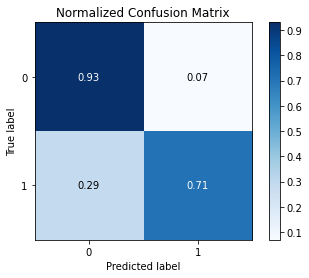

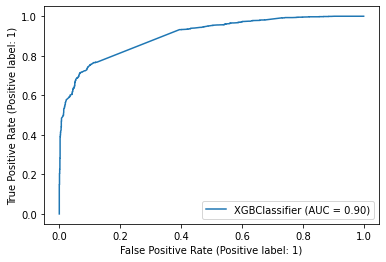

In [ ]:
# predict the labels on validation dataset
t= time()
predictions = xgb_clf.predict(test_data[0])

test_time = time() - t
print("test time:  %0.3fs" % test_time)

# compute the performance measures
score1 = metrics.accuracy_score(test_data[1], predictions)
print("accuracy:   %0.3f" % score1)

print(metrics.classification_report(test_data[1], predictions,
                                            target_names=['Inf', 'Com']))

print("confusion matrix:")
print(metrics.confusion_matrix(test_data[1], predictions))
print()
skplt.metrics.plot_confusion_matrix(test_data[1], predictions, normalize=True)
plt.show()
svc_disp = metrics.RocCurveDisplay.from_estimator(xgb_clf, test_data[0], test_data[1])

In [ ]:
'''
  Using GridSearch to exhaustively test hyperparameter values to get the best ones
'''
param_grid = {}
# Insert the new fixed values to the grid
param_grid["scale_pos_weight"] = [3]
param_grid["subsample"] = [0.8]
param_grid["colsample_bytree"] = [0.5]

# Give new value ranges to other params
param_grid["gamma"] = [3, 5, 7]
param_grid["max_depth"] = [9, 15, 20]
param_grid["reg_lambda"] = [10, 30, 50]
param_grid["learning_rate"] = [0.3, 0.5, 0.7, 1]
xgb_cl = xgb.XGBClassifier(objective="binary:logistic")

# exhaustively searh the best params using gridSearch
grid_cv = GridSearchCV(xgb_cl, param_grid, n_jobs=-1, cv=3, scoring="roc_auc")
_ = grid_cv.fit(train_data[0], train_data[1] )

print('Best score: ', grid_cv.best_score_)
print('Best Params:', grid_cv.best_params_)

Best score:  0.9328307931294538
Best Params: {'colsample_bytree': 0.5, 'gamma': 3, 'learning_rate': 0.3, 'max_depth': 20, 'reg_lambda': 10, 'scale_pos_weight': 3, 'subsample': 0.8}


In [ ]:
final_clf = xgb.XGBClassifier(
    **grid_cv.best_params_,
    objective="binary:logistic",
)
t= time()
final_clf.fit(train_data[0], trai n_data[1])

training_time = time() - t
print("Training time:  %0.3fs" % training_time)

Training time:  17.456s


test time:  0.123s
accuracy:   0.837
              precision    recall  f1-score   support

         Inf       0.93      0.73      0.82      1512
         Com       0.78      0.94      0.85      1476

    accuracy                           0.84      2988
   macro avg       0.85      0.84      0.84      2988
weighted avg       0.85      0.84      0.84      2988

confusion matrix:
[[1108  404]
 [  82 1394]]



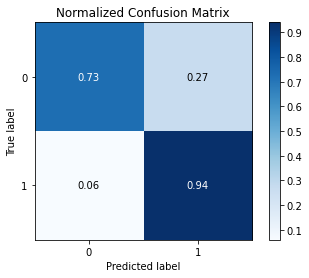

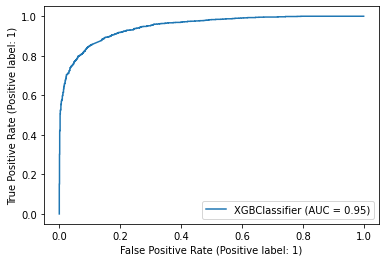

In [ ]:
# predict the labels on validation dataset
t= time()
predictions = final_clf.predict(test_data[0])

test_time = time() - t
print("test time:  %0.3fs" % test_time)

# compute the performance measures
score1 = metrics.accuracy_score(test_data[1], predictions)
print("accuracy:   %0.3f" % score1)

print(metrics.classification_report(test_data[1], predictions,
                                            target_names=['Inf', 'Com']))

print("confusion matrix:")
print(metrics.confusion_matrix(test_data[1], predictions))
print()
skplt.metrics.plot_confusion_matrix(test_data[1], predictions, normalize=True)
plt.show()
svc_disp = metrics.RocCurveDisplay.from_estimator(final_clf, test_data[0], test_data[1])